#df is the train dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ml_kaggle_practice/phy_chem_bio/train.csv')

In [3]:
df2=pd.read_csv('/content/drive/MyDrive/ml_kaggle_practice/phy_chem_bio/test.csv')



 Holup


are these reddit commentsss???

 That's what it seems like

In [4]:
df.Comment.value_counts()[(df.Comment.value_counts()>2)]

,count
Comment,
[removed],114
[deleted],65
Thank you!,7
Thank you,5
Yes,5
Thanks!,5
Forbidden ice cream,4
Fair enough.,4
u/savevideo,4


[removed] and [deleted] are unnecessary

those must've been very offensive/inaccurate to even be deleted by a reddit mod.

so let's just impute them with


`"offensive line"`



In [5]:
df2.Comment.value_counts()[(df2.Comment.value_counts()>2)]

,count
Comment,


No such removed or deleted in the test dataset!!!!

Let's get back to imputing

In [6]:
X_train=df['Comment']
y_train=df['Topic']

In [7]:
def rep(row):
  if row=='[removed]' or row=='[deleted]':
    row=np.nan
  return row

In [8]:
X_train=X_train.apply(rep)

In [9]:
X_train.isna().sum()

179

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
si=SimpleImputer(strategy='constant',fill_value='offensive line')

In [12]:
X_train_imp=si.fit_transform(pd.DataFrame(X_train))

In [13]:
X_train=pd.DataFrame(X_train_imp,columns=['Comment'])

In [14]:
y_train.value_counts()

,count
Topic,
Biology,3591
Chemistry,2920
Physics,2184


In [15]:
y_train.isna().sum()

0

Phew!! no issues in the target here

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

The plan is simple create a pipe where the first step is vectorize then feed that to multinomialNB

In [17]:
pipe=Pipeline([
    ('vecto',CountVectorizer()),
    ('nb',MultinomialNB())
])

Let's detour a bit and test our CountVectorizer

In [18]:
l=['Hi there! How are you']

In [19]:
cv=CountVectorizer()
cv.fit_transform(l)
cv.vocabulary_

{'hi': 1, 'there': 3, 'how': 2, 'are': 0, 'you': 4}

In [20]:
cv2=CountVectorizer()

In [21]:
X_c=cv2.fit_transform(X_train)

In [22]:
cv2.vocabulary_

{'comment': 0}

Wellll this is very wierd

but let's solve thissss


In [23]:
X_list=[]
for i in X_train.Comment:
  X_list.append(i)

In [24]:
len(X_list)

8695

In [25]:
X_c=cv2.fit_transform(X_list)

In [26]:
len(cv2.vocabulary_)

18177

In [27]:
pipe.fit(X_list,y_train)

Pipeline(steps=[('vecto', CountVectorizer()), ('nb', MultinomialNB())])

In [62]:
y_pred_train=pipe.predict(X_list)

In [30]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

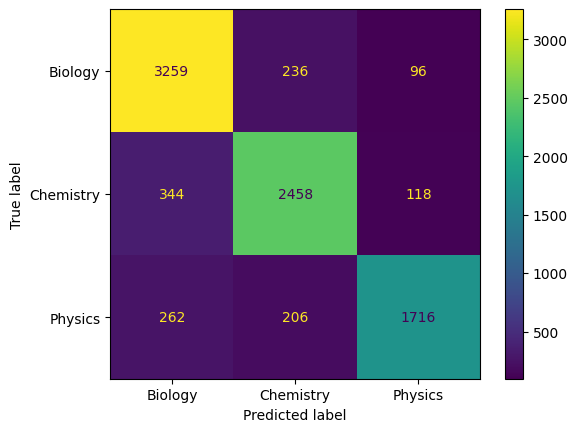

In [45]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train)

In [63]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

     Biology       0.84      0.91      0.87      3591
   Chemistry       0.85      0.84      0.84      2920
     Physics       0.89      0.79      0.83      2184

    accuracy                           0.85      8695
   macro avg       0.86      0.85      0.85      8695
weighted avg       0.86      0.85      0.85      8695



# Let's read the erronous responses ehhh

In [33]:
X_train[y_pred_train!=y_train]

,Comment
5,I meant that the question itself is unclear.
17,"Hey, you’ll get there one day."
37,Potato
46,offensive line
68,Depends how strong your floor is too.
...,...
8678,Does it make the toaster dance?
8682,It’s a kind of magic
8683,"People with ""raging curiosity"" go far in life...."
8686,"Are you wanting this to be a ""peel off"" mask? ..."


Yeah these are really general so the model wasn't bad


also, context could help because,

 `potato`??!!???!!

#After observing

By default CountVectorizer lower cases all words let's make it false as Capitalising in terms of texting is a certain form of expression

# A function that outputs the field when the input is the comment

In [56]:
def pred_field(com):
  return gs2.predict([com])[0]

In [57]:
pred_field('mRna')

'Biology'

In [43]:
from sklearn.model_selection import GridSearchCV

In [46]:
pg={
    'vecto__lowercase':[True,False]
}

In [48]:
gs=GridSearchCV(pipe,pg,cv=5)

In [50]:
gs.fit(X_list,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vecto', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'vecto__lowercase': [True, False]})

In [52]:
gs.best_params_

{'vecto__lowercase': True}

# AHHHHHHHH!!!!! a shocker. I thought turing it down would boost it.


I'll try it manually too

In [54]:
pg={
    'vecto__lowercase':[False]
}
gs2=GridSearchCV(pipe,pg,cv=5)

In [55]:
gs2.fit(X_list,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vecto', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'vecto__lowercase': [False]})

In [60]:
y_pred2_train=gs2.predict(X_list)

In [61]:
print(classification_report(y_train,y_pred2_train)) #turned lowercase to False

              precision    recall  f1-score   support

     Biology       0.85      0.91      0.88      3591
   Chemistry       0.86      0.86      0.86      2920
     Physics       0.90      0.79      0.84      2184

    accuracy                           0.86      8695
   macro avg       0.87      0.85      0.86      8695
weighted avg       0.87      0.86      0.86      8695



In [64]:
print(classification_report(y_train,y_pred_train))  # base case

              precision    recall  f1-score   support

     Biology       0.84      0.91      0.87      3591
   Chemistry       0.85      0.84      0.84      2920
     Physics       0.89      0.79      0.83      2184

    accuracy                           0.85      8695
   macro avg       0.86      0.85      0.85      8695
weighted avg       0.86      0.85      0.85      8695



this is obviously better duuuhhhh

# Why just naive-bayes ???

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
pipe2=Pipeline([
    ('vecto',CountVectorizer(lowercase=False)),
    ('logreg',LogisticRegression(n_jobs=-1))
])

In [72]:
pipe2.fit(X_list,y_train)

Pipeline(steps=[('vecto', CountVectorizer(lowercase=False)),
                ('logreg', LogisticRegression(n_jobs=-1))])

In [73]:
y_pred_log_train=pipe2.predict(X_list)

In [75]:
print(classification_report(y_train,y_pred_log_train))

              precision    recall  f1-score   support

     Biology       0.96      0.97      0.97      3591
   Chemistry       0.95      0.96      0.95      2920
     Physics       0.96      0.93      0.95      2184

    accuracy                           0.96      8695
   macro avg       0.96      0.95      0.96      8695
weighted avg       0.96      0.96      0.96      8695



Well, is this overfitting or is this really good??

In [77]:
X_test=df2['Comment']
y_test=df2['Topic']

In [81]:
y_pred_test=pipe.predict(X_test)

In [80]:
y_pred2_test=gs2.predict(X_test)

In [78]:
y_pred_log_test=pipe2.predict(X_test)

In [82]:
print(classification_report(y_test,y_pred_test))#base case

              precision    recall  f1-score   support

     Biology       0.88      0.85      0.86       614
   Chemistry       0.79      0.84      0.82       506
     Physics       0.87      0.84      0.86       466

    accuracy                           0.85      1586
   macro avg       0.85      0.85      0.85      1586
weighted avg       0.85      0.85      0.85      1586



In [83]:
print(classification_report(y_test,y_pred2_test)) # after turning lowercase to False

              precision    recall  f1-score   support

     Biology       0.87      0.84      0.86       614
   Chemistry       0.78      0.83      0.80       506
     Physics       0.84      0.83      0.84       466

    accuracy                           0.83      1586
   macro avg       0.83      0.83      0.83      1586
weighted avg       0.83      0.83      0.83      1586



In [84]:
print(classification_report(y_test,y_pred_log_test)) # logistic regression

              precision    recall  f1-score   support

     Biology       0.83      0.81      0.82       614
   Chemistry       0.74      0.79      0.76       506
     Physics       0.80      0.77      0.79       466

    accuracy                           0.79      1586
   macro avg       0.79      0.79      0.79      1586
weighted avg       0.79      0.79      0.79      1586



Ahhh it was overfitting afterall  


or was it???

(insert Vsauce theme)

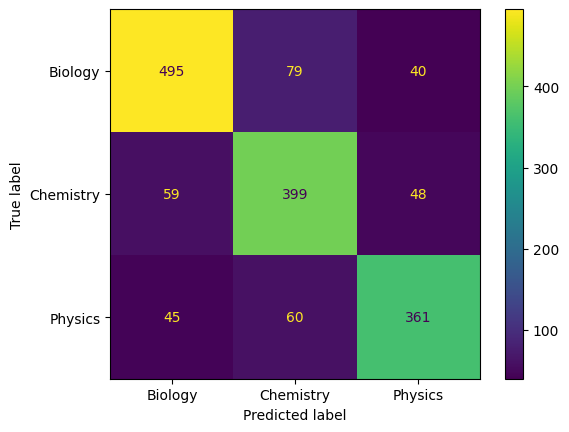

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log_test)

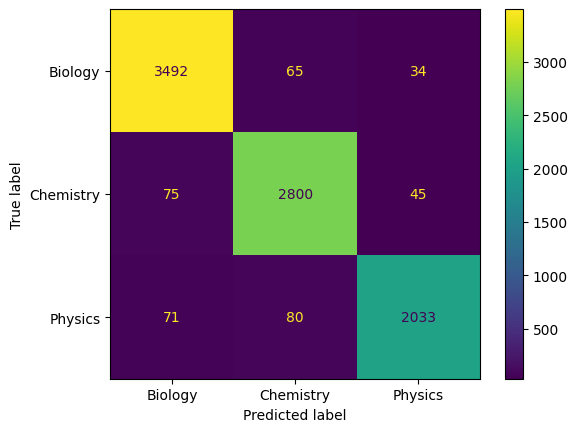

In [86]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_log_train)

I can observe how Naive-Bayes gave similar results for both test and train.

Logistic Regression has overfitted. Let's regularize it

In [ ]:
models=[]
for i in [1e-4,1e-3,1e-2]:
  new_pipe=Pipeline([
      ('vecto',CountVectorizer(lowercase=False)),
      ('log_reg',LogisticRegression(penalty='l1',C=i,solver='saga'))
  ])
  models.append(
      new_pipe
      )